In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


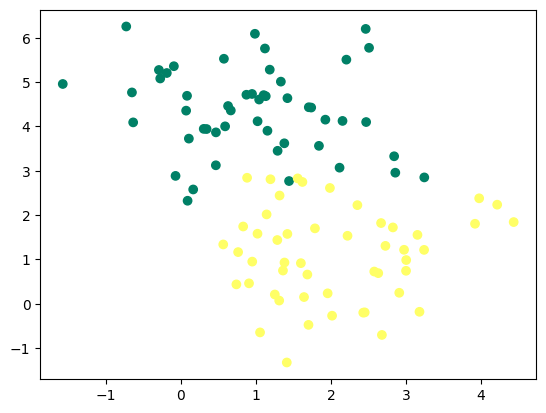

In [3]:
# Creation d'un dataset de 100 elements et de 2 colonnes/features
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Dimensions de X: {X.shape}')
print(f'Dimensions de y: {y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [4]:
def initialisation(X):
	W = np.random.randn(X.shape[1], 1)
	b = np.random.randn(1)
	return W, b

In [5]:
def model(X, W, b):
	Z = X.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return A

In [7]:
W, b = initialisation(X)
A = model(X, W, b)
A.shape

(100, 1)

In [8]:
def log_loss(A, y):
	m = len(y)
	return 1/m * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [10]:
log_loss(A, y)

2.0596263569951674

In [12]:
def gradients(A, X, y):
	m = len(y)
	dW = 1 / m * np.dot(X.T, A - y)
	db = 1 / m * np.sum(A - y)
	
	return dW, db

In [19]:
dW, db = gradients(A, X, y)
dW.shape, db.shape, db # Puisque db est un nbre reel, il n'a pas de shape

((2, 1), (), -0.46366745655736175)

In [20]:
def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return W, b

In [43]:
def predict(X, W, b):
	A = model(X, W, b)
	print(A)
	return A >= 0.5

In [28]:
from sklearn.metrics import accuracy_score

In [34]:
def perceptron(X, y, learning_rate=0.03, n_iter=1000):
	W, b = initialisation(X)
	
	Loss = []
	
	for i in range(n_iter):
		A = model(X, W, b)
		Loss.append(log_loss(A, y))
		dW, db = gradients(A, X, y)
		W, b = update(dW, db, W, b, learning_rate)
		
	y_pred = predict(X, W, b)
	print(f'Accuracy: {accuracy_score(y, y_pred)}')
	
	plt.plot(Loss)
	plt.show()
	
	return W, b

Accuracy: 0.94


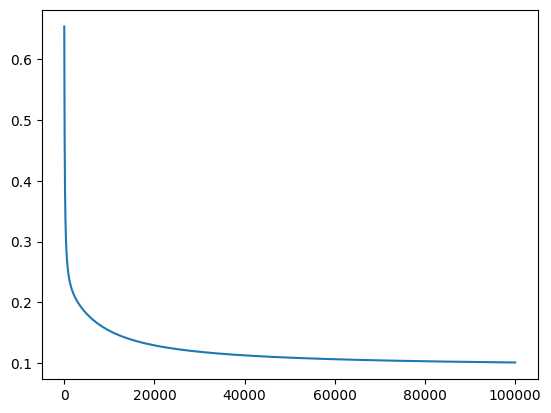

In [40]:
W_final, b_final = perceptron(X, y, 0.01, 100000)

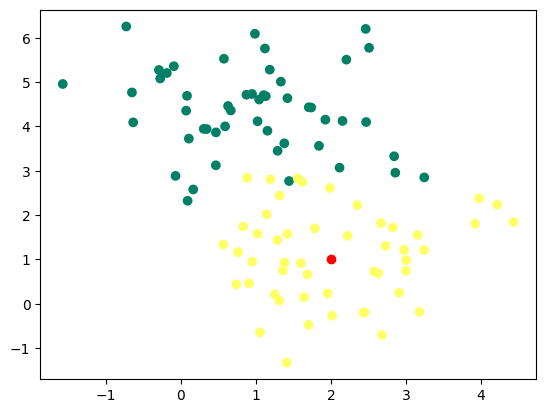

[0.99801739]


array([ True])

In [44]:
new_search = np.array([2, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_search[0], new_search[1], c='r')
plt.show()
predict(new_search, W_final, b_final)